In [1]:
from BloodVesselGraph import AutomatonToGraph

## Blood Vessel Graph tests

Here i will do some tests with the proposed method for building a graph from the simulated blood vessel network that our angiogenesis model produces. 

In [2]:
from TumorModel import Tissue
import numpy as np
import matplotlib.pyplot as plt
from TumorModel import Therapy
from TumorModel import CellType
from TumorModel import TherapyType
from AngiogenesisModel import AngiogenesisModel
from tqdm import tqdm
from BloodVesselGraph import GraphSketchType
from BloodVesselGraph import AutomatonToGraph

In [3]:
width = 150
height = 150

centerX = int(width/2)
centerY = int(width/2)

tissue = Tissue(width, height)

#Inicializamos el tejido
tissue.addProliferatingCell(centerX, centerY, False,0)
tissue.addProliferatingCell(centerX + 1,centerY, False,0)
tissue.addProliferatingCell(centerX - 1, centerY, False,0)
tissue.addProliferatingCell(centerX, centerY + 1, False,0)
tissue.addProliferatingCell(centerX, centerY - 1, False,0)

nSteps = 300
tissue.evolveWithMovieInitially(nSteps, True)

100%|█████████████████████████████████████████| 300/300 [00:40<00:00,  7.49it/s]


100%|█████████████████████████████████████████| 120/120 [01:14<00:00,  1.61it/s]


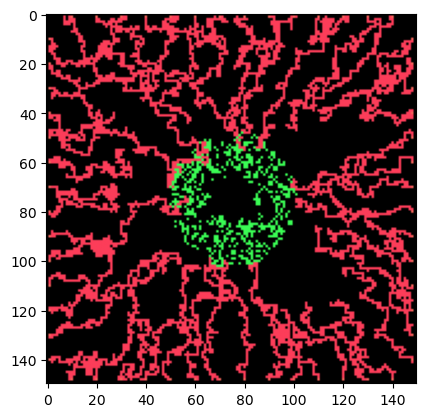

In [4]:
tumorSlices = tissue.evolutionMovie

proliferatingPositions = np.zeros((height, width))
finalSlice = tumorSlices[:,:,:,-1]
for i in range(0,height):
    for j in range(0,width):
        if((finalSlice[i,j,:] == CellType.PROLIFERATING.value).all()):
            proliferatingPositions[i,j] = 1

angiogenesisModel = AngiogenesisModel(width, height)
angiogenesisModel.setInitialConcentrations(proliferatingPositions)
tipCellLocations = np.zeros((height, width))
for i in range(1, width - 1):
    if(i%10 == 0):
        tipCellLocations[1,i] = 1
        tipCellLocations[height-2,i] = 1
        tipCellLocations[i,1] = 1
        tipCellLocations[i, width-2] = 1

angiogenesisModel.setTipCells(tipCellLocations)

nSteps = 120
angiogenesisModel.evolveSystem(nSteps)

plt.figure()
plt.imshow(angiogenesisModel.getPicture(tipCellLocations, proliferatingPositions, angiogenesisModel.occupiedCells))

In [9]:
automatonToGraph = AutomatonToGraph()
automatonToGraph.differenceRadius =5
graph = automatonToGraph.convertAutomatonToGraphWithTumor(angiogenesisModel.occupiedCells, proliferatingPositions)

print("Number of vertices: "+str(len(graph.nodes)))
print("Number of edges: "+str(len(graph.getAllConnections())))

100%|████████████████████████████████████████| 389/389 [00:01<00:00, 203.38it/s]

Number of vertices: 390
Number of edges: 1854


[22, 10, 26, 38, 15]

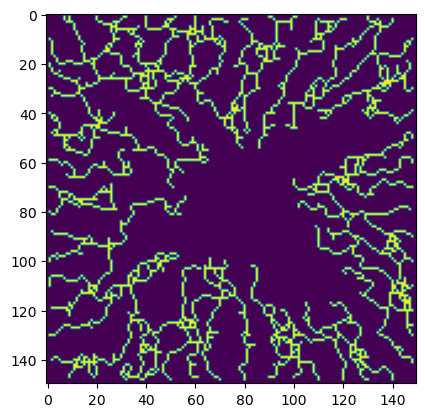

In [10]:
plt.figure()
plt.imshow(automatonToGraph.skeletonizedImage)
#plt.xlim([0,50])
#plt.ylim([100,140])

[x.toNodeId for x in graph.connections[6]]

## Graph with nodes positioned on their respective automaton location

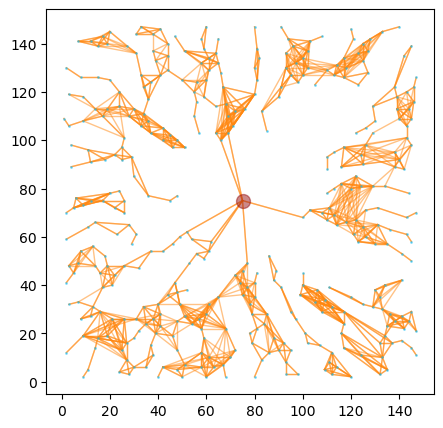

In [11]:
fig,ax = plt.subplots(figsize = (5,5))

scale = 1
graph.drawGraph(scale, ax, GraphSketchType.ORIGINAL)


## Graph with circle configuration

1854


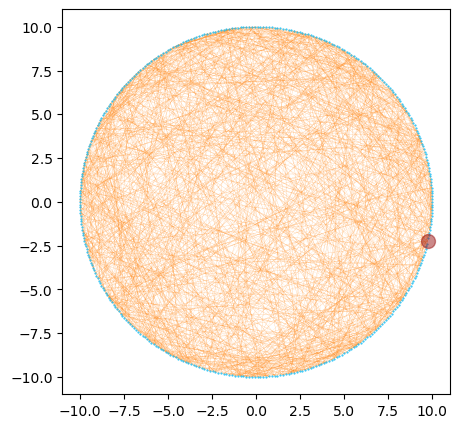

In [12]:
fig,ax = plt.subplots(figsize = (5,5))

scale = 1
graph.drawGraph(scale, ax, GraphSketchType.CIRCULAR)

## Graph displayed using Force-Directed drawing (this should be the nicest looking)

100%|█████████████████████████████████████████| 100/100 [01:25<00:00,  1.17it/s]


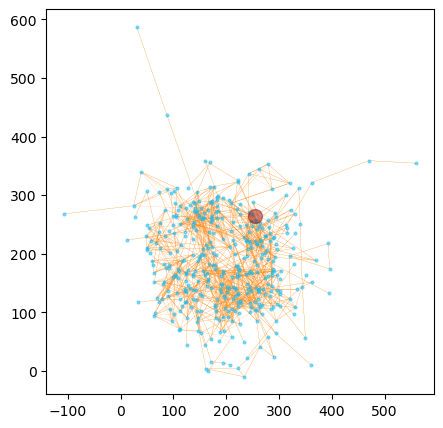

In [13]:
fig,ax = plt.subplots(figsize = (5,5))

scale = 1
graph.drawGraph(scale, ax, GraphSketchType.AESTHETIC)
#ax.set_xlim([-500, 500])
#ax.set_ylim([-500,500])



## Degree distribution of the graph

(0.0, 10.0)

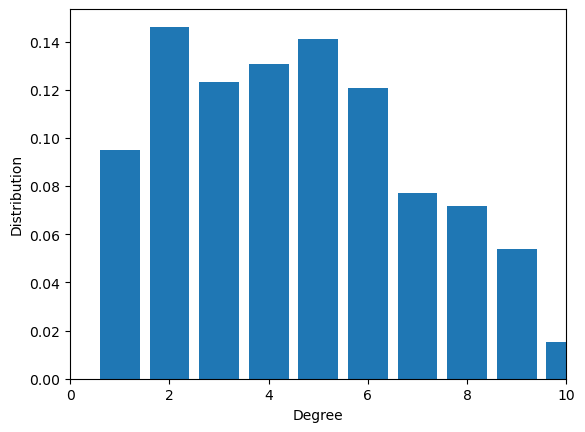

In [14]:
xValues, dist = graph.getDegreeDistribution()
plt.figure()
plt.bar(xValues, dist)
plt.xlabel("Degree")
plt.ylabel("Distribution")
plt.xlim([0,10])

In [15]:
print("The average degree of the graph is "+str(graph.getAverageDegree()))

The average degree of the graph is 4.753846153846154


In [16]:
graph.exportAdjacencyTable("red_vacular_ejemplo.csv")